In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,Theo Hernández,fr FRA,DF,Milan,it Serie A,25.0,1997.0,97.0,95.0,8415,93.5,0.17,0.31,0.15,0.29,0.13,0.28,0.11,0.26,272.0,141.0,52.0,118.0,43.0,68.72,2.58,16.66,33.33,19.91,2.24,68.68,2.91,1.51,1.26,39.18,278.91,174.26,4.00,2.88,0.76,1.74,0.75,43.07,5.08,3.040000,0.380000,1.86,0.49,0.15,0.18,0.31,1.86,0.29,0.02,0.02,0.03,0.01,0.01,4322.0,5383.0,80.0,69809.0,23453.0,2291.0,2557.0,90.0,1580.0,1904.0,83.0,336.0,593.0,57.0,0.00,0.15,0.14,-0.01,1.39,3.25,1.20,0.39,4.03,57.57,47.03,10.36,1.73,0.06,0.59,3.15,7.86,0.77,0.04,0.68,0.00,46.22,0.18,1.28,1.480000,0.400000,3.60,13.42,2.33,3.9,3.6,67.0,0.25,0.02,0.01,1.02,2.27,0.17,0.83,0.94,0.02,0.00,6.63,1.20,0.58,3,0,0,3,0,0
1,1,Marcel Sabitzer,at AUT,MF,RB Leipzig+RB Leipzig+Bayern Munich+Manchester...,de Bundesliga+eng Premier League+de Bundesliga,29.0,1994.0,80.0,46.0,53186,47.1,0.21,0.34,0.13,0.25,0.25,0.31,0.17,0.25,38.0,22.0,58.0,15.0,39.0,71.53,1.78,12.23,40.19,19.51,2.02,71.44,0.81,0.47,0.32,38.74,162.38,72.17,1.27,1.38,0.17,1.32,0.98,49.37,3.82,11.670000,1.170000,2.38,0.02,0.00,0.17,0.08,2.38,0.26,0.00,0.00,0.02,0.00,0.00,2306.0,2878.0,80.0,35602.0,10553.0,1258.0,1433.0,88.0,806.0,954.0,84.0,147.0,272.0,54.0,0.06,0.12,0.17,0.00,1.19,5.12,1.51,0.24,7.05,61.10,57.54,3.04,1.51,0.12,0.53,1.12,1.38,0.04,0.02,0.00,0.00,48.96,0.53,1.21,9.360000,2.940000,0.29,0.94,0.24,-1.5,-2.3,48.0,0.25,0.00,0.00,1.12,1.32,0.19,1.34,1.08,0.00,0.00,6.73,0.98,1.04,3,1,0,0,0,3
2,2,Dejan Kulusevski,se SWE,"MF,FW",Juventus+Tottenham+Juventus,it Serie A+eng Premier League+it Serie A,23.0,2000.0,103.0,61.0,1265762,67.0,0.18,0.49,0.18,0.49,0.15,0.36,0.15,0.36,260.0,138.0,53.0,114.0,44.0,46.15,0.64,6.18,17.72,23.27,5.04,46.15,3.88,2.06,1.70,29.58,207.92,110.02,3.97,2.09,1.76,3.33,2.06,

In [4]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,0.95,0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.00,0.00,0.00,0.00,0.00,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.00,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,0.07,0.00,0.00,0.88,1.90,0.15,0.58,1.39,0.00,0.07,5.47,0.36,0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
1,1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,0.0,2000.0,30,14,1267,14.1,0.14,0.28,0.14,0.28,0.14,0.27,0.14,0.27,77.0,34.0,44.2,41.0,53.2,47.87,0.78,7.66,21.35,20.78,3.33,47.87,5.46,2.41,2.91,28.79,192.98,98.37,2.62,2.06,0.64,2.91,2.70,32.41,6.45,3.76,0.57,2.91,0.07,0.57,0.21,0.00,0.00,0.43,0.00,0.14,0.00,0.00,0.00,365.0,472.0,77.3,4890.0,1506.0,206.0,240.0,85.8,105.0,130.0,80.8,19.0,32.0,59.4,0.14,0.13,0.14,0.01,1.56,2.13,0.99,0.21,3.97,33.48,31.13,2.06,0.21,0.35,0.07,1.56,0.85,0.43,0.14,0.21,0.00,25.89,0.28,1.49,1.28,0.50,0.11,0.29,0.11,0.0,0.0,44.8,0.21,0.07,0.07,1.06,1.77,0.35,0.14,1.28,0.00,0.00,6.24,0.92,1.13,2.27,0.92,0.92,0.43,1.13,2.27,1.13,1.84,0.07,2.41,0.28,0.00,50.0
2,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.

In [5]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (FW) and midfielders (MF) from the 'final_player' DataFrame
defense_players = final_player[final_player['Pos'].isin(['DF'])]
newbie = newbie[newbie['Pos'].isin(['DF'])]
player_2021 = player_2021[player_2021['Pos'].isin(['DF'])]
player_2022 = player_2022[player_2022['Pos'].isin(['DF'])]
player_2023 = player_2023[player_2023['Pos'].isin(['DF'])]
player_2024 = player_2024[player_2024['Pos'].isin(['DF'])]

# Reset the index if needed
defense_players = defense_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2024= player_2024.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)


In [7]:
Calafiori_2024=player_2024[player_2024['Player']=='Riccardo Calafiori']
Calafiori_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
78,426,Riccardo Calafiori,it ITA,DF,Bologna,it Serie A,0.0,2002.0,30,26,2349,26.1,0.08,0.27,0.08,0.27,0.05,0.1,0.05,0.1,21.0,13.0,61.9,7.0,33.3,80.54,9.0,36.59,39.0,5.82,0.88,80.54,0.8,0.5,0.27,49.46,278.81,154.18,1.07,1.07,0.04,1.19,0.46,53.95,0.88,1.77,0.31,1.38,0.0,0.08,0.19,0.0,0.11,0.19,0.0,0.0,0.11,0.0,0.0,1622.0,1810.0,89.6,28565.0,8660.0,684.0,737.0,92.8,792.0,844.0,93.8,123.0,172.0,71.5,0.19,0.05,0.03,0.15,0.65,3.6,0.38,0.11,3.68,69.35,65.9,3.41,1.46,0.08,0.61,0.34,0.65,0.0,0.0,0.0,0.0,62.15,0.04,0.77,0.65,0.23,0.12,0.33,0.08,0.6,0.6,71.4,0.15,0.0,0.0,1.34,1.03,0.08,1.92,1.23,0.0,0.08,7.43,2.3,0.92,1.8,1.07,0.61,0.11,0.84,1.23,0.38,1.46,0.5,3.72,2.84,0.11,68.8


In [9]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2024_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
calafiori_2024_percentile_ranks = round(players_2024_percentile_ranks.iloc[[78]],0)

# Print the percentile ranks for Declan Rice
print(calafiori_2024_percentile_ranks)


    Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
78         77.0       94.0        77.0          94.0      61.0          57.0   

    npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
78        62.0            57.0                68.0           76.0   

    Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
78            73.0              63.0               40.0            86.0   

    Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
78                    82.0                    89.0                    84.0   

    Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
78                    47.0                    44.0                       86.0   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
78                       61.0                  68.0                     54.0   

    Carries_per_90  Total_Distance_per_90  \
78            83.0     

In [12]:
# Extract the percentile ranks, transpose, and sort them in descending order
calafiori_2024_percentile_ranks_sorted = calafiori_2024_percentile_ranks.T.sort_values(by=78, ascending=False)

# Get the top 20 parameters
top_20_params = calafiori_2024_percentile_ranks_sorted.index[:20]
top_20_params_values = calafiori_2024_percentile_ranks_sorted[78].head(20)

# Display the top 20 parameters and their values
print("Top 20 Parameters:")
print(top_20_params)
print("Values:")
print(top_20_params_values)

Top 20 Parameters:
Index(['Shot_Goal_per_90', 'Ball_Recoveries_per_90', 'A-xAG_per_90',
       'Interceptions_per_90', 'Defensive_Shot_per_90',
       'Percentage_of_Aerials_Won', 'G+A-PK_per90', 'G+A_per90',
       'Assists_per_90', 'Penalty_Kicks_Conceded_per_90', 'Shot-Shot_per_90',
       'Goal_Creating_Action_90', 'Passes_Long_Cmp%', 'Passes_Total_Cmp',
       'Passes_Short_Cmp', 'Touches_Def_3rd_per_90',
       'Progressive_Distance_Carried_per_90', 'Total_Distance_per_90',
       'Passes_Total_Cmp%', 'Passes_Short_Att'],
      dtype='object')
Values:
Shot_Goal_per_90                       99.0
Ball_Recoveries_per_90                 99.0
A-xAG_per_90                           99.0
Interceptions_per_90                   97.0
Defensive_Shot_per_90                  96.0
Percentage_of_Aerials_Won              95.0
G+A-PK_per90                           94.0
G+A_per90                              94.0
Assists_per_90                         93.0
Penalty_Kicks_Conceded_per_90          9

In [13]:
import pandas as pd







params=['Ball_Recoveries_per_90', 'Interceptions_per_90','Percentage_of_Aerials_Won', 
        'G+A_per90','Assists_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Goal_Creating_Action_90', 'Passes_Long_Cmp%', 'Passes_Total_Cmp',
        'Passes_Short_Cmp', 'Touches_Def_3rd_per_90','Progressive_Distance_Carried_per_90', 
        'Total_Distance_per_90','Passes_Total_Cmp%', 'Passes_Short_Att']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2024_percentile_ranks = defense_players[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
calafiori_2024_percentile_ranks = round(players_2024_percentile_ranks.iloc[[78]],0)

# Print the percentile ranks for Declan Rice
print(calafiori_2024_percentile_ranks)


    Ball_Recoveries_per_90  Interceptions_per_90  Percentage_of_Aerials_Won  \
78                    99.0                  97.0                       95.0   

    G+A_per90  Assists_per_90  Penalty_Kicks_Conceded_per_90  \
78       94.0            93.0                           93.0   

    Goal_Creating_Action_90  Passes_Long_Cmp%  Passes_Total_Cmp  \
78                     91.0              91.0              90.0   

    Passes_Short_Cmp  Touches_Def_3rd_per_90  \
78              89.0                    89.0   

    Progressive_Distance_Carried_per_90  Total_Distance_per_90  \
78                                 88.0                   88.0   

    Passes_Total_Cmp%  Passes_Short_Att  
78               88.0              88.0  


In [14]:
calafiori_2024_percentile_ranks_list = calafiori_2024_percentile_ranks.values.flatten().tolist()

calafiori_2024_percentile_ranks_list

[99.0,
 97.0,
 95.0,
 94.0,
 93.0,
 93.0,
 91.0,
 91.0,
 90.0,
 89.0,
 89.0,
 88.0,
 88.0,
 88.0,
 88.0]

In [16]:
image_path = "Calafiori.jpg"
fdj_cropped = Image.open(image_path)


In [17]:
len(params)

15

In [18]:
split_params = [param.replace('_', '\n') for param in params]


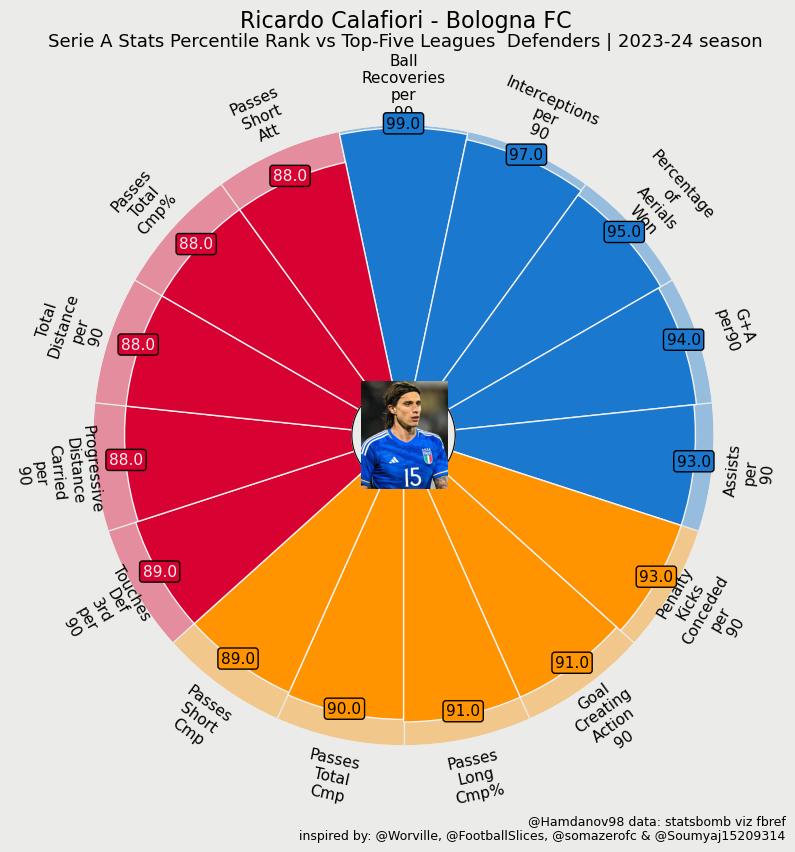

In [20]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    calafiori_2024_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Ricardo Calafiori - Bologna FC", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Serie A Stats Percentile Rank vs Top-Five Leagues  Defenders | 2023-24 season",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Calafiori_2024_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [22]:
from sklearn.decomposition import PCA
import numpy as np

# Identify features to minimize
negative_features = ['Yellow_Cards_per_90', 'Red_Cards_per_90', 'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90',
                     'Aerials_Lost_per_90','Miscontrols_per_90','Dispossessed_per_90', 'Penalty_Kicks_Conceded_per_90']

# Reverse the sign of negative features
for feature in negative_features:
    if feature in player_2024.columns:
        
        player_2024[feature]=-player_2024[feature]

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
# Normalize data
numerical_player_2024 = player_2024[params].replace([np.inf, -np.inf], 0)
normalized_player_2024 = (numerical_player_2024 - numerical_player_2024.mean()) / numerical_player_2024.std()

# Apply PCA
pca = PCA()
pca.fit(normalized_player_2024)
explained_variances = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variances >= 0.95) + 1

In [24]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
transformed_players = pca.fit_transform(normalized_player_2024)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=player_2024.index)

In [25]:
# Get de Ligt's row and compute cosine similarity
deligt_index = player_2024.index[player_2024['Player'] == 'Riccardo Calafiori'][0]
deligt_data = transformed_df.loc[deligt_index].values.reshape(1, -1)

# Remove de Ligt from the dataset for comparison
transformed_df = transformed_df.drop(index=deligt_index)

In [26]:
# Compute cosine similarity
similarity_scores = cosine_similarity(transformed_df, deligt_data).flatten()
transformed_df['similarity_to_calafiori_2024'] = similarity_scores

# Get top 10 players most similar to de Ligt
top_similar_players_indices = transformed_df.sort_values('similarity_to_calafiori_2024', ascending=False).index
top_similar_players = player_2024.loc[top_similar_players_indices]

In [27]:
# Visualize the results
player_2024['similarity_to_calafiori_2024'] = transformed_df['similarity_to_calafiori_2024']
player_2024_sorted = player_2024.sort_values(by='similarity_to_calafiori_2024', ascending=False)
player_2024_sorted

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_calafiori_2024
526,2780,Maximilian Wöber,at AUT,DF,Gladbach,de Bundesliga,0.0,1998.0,25,24,2066,23.0,0.09,0.22,0.09,0.22,0.06,0.13,0.06,0.13,4.0,2.0,50.0,2.0,50.0,78.17,10.09,39.39,32.91,6.35,1.09,78.17,0.17,0.09,0.09,42.39,217.57,119.26,1.39,0.83,0.09,-0.26,-0.09,46.35,1.00,1.40,0.31,1.00,0.09,0.00,0.22,0.00,0.09,0.17,0.04,0.00,0.09,0.00,0.0,1224.0,1485.0,82.4,22076.0,8449.0,500.0,548.0,91.2,606.0,696.0,87.1,107.0,196.0,54.6,0.13,0.07,0.05,0.06,0.52,4.39,0.52,0.30,5.57,64.57,58.96,5.43,1.39,0.00,0.22,0.91,2.65,0.0,0.00,0.00,0.0,53.22,0.17,0.61,0.83,0.13,0.11,0.67,0.07,0.7,0.7,59.5,-0.17,-0.04,-0.04,-1.17,0.13,0.22,1.65,1.35,0.00,-0.00,6.39,2.04,-1.39,2.87,1.74,1.09,0.04,1.35,2.30,0.96,2.04,1.13,4.52,4.83,0.00,58.5,0.808459
452,2434,Mohamed Simakan,fr FRA,DF,RB Leipzig,de Bundesliga,0.0,2000.0,32,23,2138,23.8,0.08,0.21,0.08,0.21,0.16,0.30,0.16,0.30,22.0,12.0,54.5,8.0,36.4,77.82,7.06,27.18,41.47,9.75,2.56,77.82,0.92,0.50,0.34,47.56,218.57,115.42,1.43,0.92,0.34,-1.13,-0.38,52.65,3.19,1.85,0.17,1.47,0.04,0.04,0.17,0.08,0.04,0.13,0.00,0.00,0.04,0.00,0.0,1347.0,1573.0,85.6,23904.0,8042.0,530.0,594.0,89.2,720.0,790.0,91.1,83.0,152.0,54.6,0.13,0.14,0.12,-0.01,0.63,4.50,0.21,0.08,4.45,66.09,61.18,4.83,2.14,0.13,0.46,0.76,2.69,0.0,0.00,0.00,0.0,56.60,0.08,0.50,1.26,0.46,0.07,0.18,0.13,-1.9,-1.9,62.5,-0.34,-0.00,-0.00,-1.47,1.05,0.13,1.22,1.22,0.04,-0.04,4.75,2.52,-1.51,2.02,1.18,0.80,0.04,1.34,1.85,0.50,1.51,0.59,3.24,2.90,0.00,72.7,0.806191
124,649,Alphonso Davies,ca CAN,DF,Bayern Munich,de Bundesliga,0.0,2000.0,29,24,2

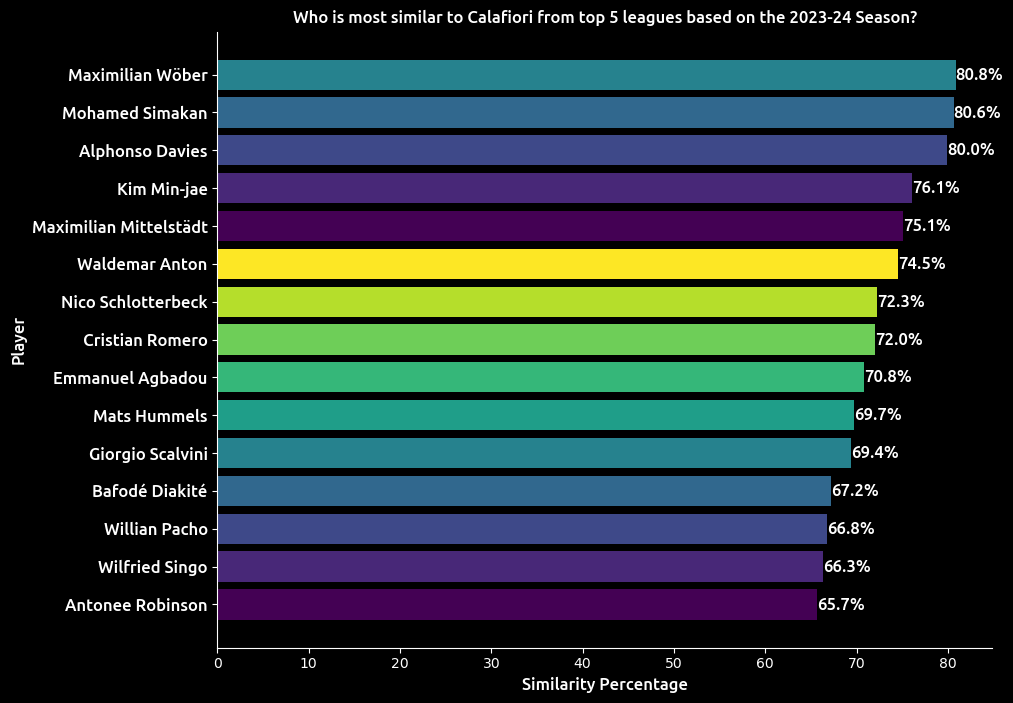

In [28]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2024 DataFrame by similarity_to_deligt_2024 in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_calafiori_2024', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_calafiori_2024'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Calafiori from top 5 leagues based on the 2023-24 Season?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Similar_2024.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()
